# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import traceback
import numpy as np
# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
validation_file="traffic-signs-data/valid.p"
testing_file = "traffic-signs-data/test.p"


with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
from sklearn.model_selection import train_test_split


# n_train, n_test, l_train, l_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

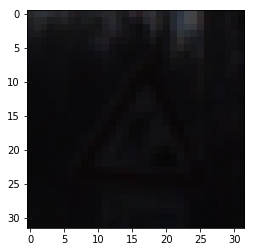

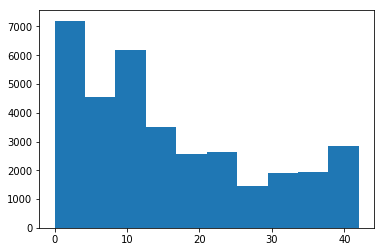

25


In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

# plt.figure(figsize=(1,1))
plt.imshow(image)
plt.show()

plt.hist(y_train)
plt.show()

print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [5]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 128

In [6]:
from tensorflow.contrib.layers import flatten

keep_prob = tf.placeholder(tf.float32)
phase = tf.placeholder(tf.bool, name='phase')

def tensor_variable(shape):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.01

    return tf.Variable(tf.truncated_normal(shape=shape, mean = mu, stddev = sigma))

weights = {
    'wc1': tensor_variable([5, 5, 3, 6]),
    'wc2': tensor_variable([5, 5, 6, 16]),
    'wd1': tensor_variable([5*5*16, 400]),
    'wd2': tensor_variable([400, 120]),
#     'wd3': tensor_variable([120, 84]),
    'out': tensor_variable([120, 43])}

biases = {
    'bc1': tensor_variable([6]),
    'bc2': tensor_variable([16]),
    'bd1': tensor_variable([400]),
    'bd2': tensor_variable([120]),
#     'bd3': tensor_variable([84]),
    'out': tensor_variable([43])}

def activation(x):
    return tf.nn.relu(x)
    
def conv2d(x, W, b, strides=1, is_training=False):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    x = tf.contrib.layers.batch_norm(x, decay=0.99, is_training=is_training,
                                              updates_collections=None)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='VALID')

def LeNet(x):    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv_l1 = conv2d(x, weights['wc1'], biases['bc1'], is_training=phase)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv_l1 = maxpool2d(conv_l1)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv_l2 = conv2d(conv_l1, weights['wc2'], biases['bc2'], is_training=phase)
        
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv_l2 = maxpool2d(conv_l2)
    
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    flat = flatten(conv_l2)
    
    fc1 = tf.reshape(flat, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob)
    
    # TODO: Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2 = tf.reshape(fc1, [-1, weights['wd2'].get_shape().as_list()[0]])
    fc2 = tf.add(tf.matmul(fc2, weights['wd2']), biases['bd2'])
    fc2 = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob)

    
    # TODO: Layer 5: Output. Input = 120. Output = 43.
#     fc3 = tf.reshape(fc2, [-1, weights['wd3'].get_shape().as_list()[0]])
#     fc3 = tf.add(tf.matmul(fc3, weights['wd3']), biases['bd3'])
#     fc3 = tf.nn.relu(fc3)

    #output layer
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    
    return logits

In [7]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

In [8]:
rate = 1e-3

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)
prediction = tf.argmax(logits, 1)

probabilities = tf.nn.softmax(logits)
get_top_5 = tf.nn.top_k(probabilities, k=5)

In [9]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0, phase: False})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Using TensorFlow backend.
  0%|          | 0/272 [00:00<?, ?it/s]

Total samples:  34799
Training...



  1%|▏         | 4/272 [00:00<00:08, 30.94it/s]

EPOCH 1 ...
Validation Loss = 1.290
Validation Accuracy = 0.571



  1%|▏         | 4/272 [00:00<00:08, 31.25it/s]

EPOCH 2 ...
Validation Loss = 0.648
Validation Accuracy = 0.800



  1%|▏         | 4/272 [00:00<00:08, 31.37it/s]

EPOCH 3 ...
Validation Loss = 0.488
Validation Accuracy = 0.874



  1%|▏         | 4/272 [00:00<00:08, 31.11it/s]

EPOCH 4 ...
Validation Loss = 0.329
Validation Accuracy = 0.915



  1%|▏         | 4/272 [00:00<00:08, 31.39it/s]

EPOCH 5 ...
Validation Loss = 0.279
Validation Accuracy = 0.939



  1%|▏         | 4/272 [00:00<00:08, 31.35it/s]

EPOCH 6 ...
Validation Loss = 0.189
Validation Accuracy = 0.952



  1%|▏         | 4/272 [00:00<00:08, 30.88it/s]

EPOCH 7 ...
Validation Loss = 0.259
Validation Accuracy = 0.930



  1%|▏         | 4/272 [00:00<00:08, 30.93it/s]

EPOCH 8 ...
Validation Loss = 0.174
Validation Accuracy = 0.954



  1%|▏         | 4/272 [00:00<00:08, 31.75it/s]

EPOCH 9 ...
Validation Loss = 0.178
Validation Accuracy = 0.950



  1%|▏         | 4/272 [00:00<00:08, 31.11it/s]

EPOCH 10 ...
Validation Loss = 0.178
Validation Accuracy = 0.959



  1%|▏         | 4/272 [00:00<00:08, 31.11it/s]

EPOCH 11 ...
Validation Loss = 0.173
Validation Accuracy = 0.957



  1%|▏         | 4/272 [00:00<00:08, 30.68it/s]

EPOCH 12 ...
Validation Loss = 0.154
Validation Accuracy = 0.961



  1%|▏         | 4/272 [00:00<00:08, 30.79it/s]

EPOCH 13 ...
Validation Loss = 0.162
Validation Accuracy = 0.963



  1%|▏         | 4/272 [00:00<00:08, 30.98it/s]

EPOCH 14 ...
Validation Loss = 0.211
Validation Accuracy = 0.943



  1%|▏         | 4/272 [00:00<00:08, 31.48it/s]

EPOCH 15 ...
Validation Loss = 0.166
Validation Accuracy = 0.956



  1%|▏         | 4/272 [00:00<00:08, 31.53it/s]

EPOCH 16 ...
Validation Loss = 0.191
Validation Accuracy = 0.949



  1%|▏         | 4/272 [00:00<00:08, 30.87it/s]

EPOCH 17 ...
Validation Loss = 0.143
Validation Accuracy = 0.968



  1%|▏         | 4/272 [00:00<00:08, 30.83it/s]

EPOCH 18 ...
Validation Loss = 0.173
Validation Accuracy = 0.960



  1%|▏         | 4/272 [00:00<00:08, 31.29it/s]

EPOCH 19 ...
Validation Loss = 0.146
Validation Accuracy = 0.964



  1%|▏         | 4/272 [00:00<00:08, 30.57it/s]

EPOCH 20 ...
Validation Loss = 0.116
Validation Accuracy = 0.968



  1%|▏         | 4/272 [00:00<00:08, 30.86it/s]

EPOCH 21 ...
Validation Loss = 0.174
Validation Accuracy = 0.956



  1%|▏         | 4/272 [00:00<00:08, 31.32it/s]

EPOCH 22 ...
Validation Loss = 0.114
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.32it/s]

EPOCH 23 ...
Validation Loss = 0.158
Validation Accuracy = 0.959



  1%|▏         | 4/272 [00:00<00:08, 31.17it/s]

EPOCH 24 ...
Validation Loss = 0.160
Validation Accuracy = 0.961



  1%|▏         | 4/272 [00:00<00:08, 30.88it/s]

EPOCH 25 ...
Validation Loss = 0.188
Validation Accuracy = 0.959



  1%|▏         | 4/272 [00:00<00:08, 31.13it/s]

EPOCH 26 ...
Validation Loss = 0.125
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.31it/s]

EPOCH 27 ...
Validation Loss = 0.114
Validation Accuracy = 0.969



  1%|▏         | 4/272 [00:00<00:08, 31.38it/s]

EPOCH 28 ...
Validation Loss = 0.103
Validation Accuracy = 0.972



  1%|▏         | 4/272 [00:00<00:08, 31.64it/s]

EPOCH 29 ...
Validation Loss = 0.135
Validation Accuracy = 0.966



  1%|▏         | 4/272 [00:00<00:08, 31.26it/s]

EPOCH 30 ...
Validation Loss = 0.164
Validation Accuracy = 0.965



  1%|▏         | 4/272 [00:00<00:08, 31.17it/s]

EPOCH 31 ...
Validation Loss = 0.111
Validation Accuracy = 0.977



  1%|▏         | 4/272 [00:00<00:08, 31.85it/s]

EPOCH 32 ...
Validation Loss = 0.193
Validation Accuracy = 0.953



  1%|▏         | 4/272 [00:00<00:08, 31.96it/s]

EPOCH 33 ...
Validation Loss = 0.131
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.22it/s]

EPOCH 34 ...
Validation Loss = 0.128
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.78it/s]

EPOCH 35 ...
Validation Loss = 0.206
Validation Accuracy = 0.949



  1%|▏         | 4/272 [00:00<00:08, 31.55it/s]

EPOCH 36 ...
Validation Loss = 0.138
Validation Accuracy = 0.970



  1%|▏         | 4/272 [00:00<00:08, 31.58it/s]

EPOCH 37 ...
Validation Loss = 0.144
Validation Accuracy = 0.969



  1%|▏         | 4/272 [00:00<00:08, 31.39it/s]

EPOCH 38 ...
Validation Loss = 0.134
Validation Accuracy = 0.965



  1%|▏         | 4/272 [00:00<00:08, 30.90it/s]

EPOCH 39 ...
Validation Loss = 0.162
Validation Accuracy = 0.961



  1%|▏         | 4/272 [00:00<00:08, 30.99it/s]

EPOCH 40 ...
Validation Loss = 0.097
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.41it/s]

EPOCH 41 ...
Validation Loss = 0.112
Validation Accuracy = 0.976



  1%|▏         | 4/272 [00:00<00:08, 31.39it/s]

EPOCH 42 ...
Validation Loss = 0.139
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.31it/s]

EPOCH 43 ...
Validation Loss = 0.106
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.38it/s]

EPOCH 44 ...
Validation Loss = 0.162
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.44it/s]

EPOCH 45 ...
Validation Loss = 0.162
Validation Accuracy = 0.961



  1%|▏         | 4/272 [00:00<00:08, 31.55it/s]

EPOCH 46 ...
Validation Loss = 0.156
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.28it/s]

EPOCH 47 ...
Validation Loss = 0.107
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.23it/s]

EPOCH 48 ...
Validation Loss = 0.143
Validation Accuracy = 0.969



  1%|▏         | 4/272 [00:00<00:08, 30.82it/s]

EPOCH 49 ...
Validation Loss = 0.137
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 30.53it/s]

EPOCH 50 ...
Validation Loss = 0.095
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.51it/s]

EPOCH 51 ...
Validation Loss = 0.102
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.72it/s]

EPOCH 52 ...
Validation Loss = 0.130
Validation Accuracy = 0.972



  1%|▏         | 4/272 [00:00<00:08, 31.79it/s]

EPOCH 53 ...
Validation Loss = 0.107
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 30.74it/s]

EPOCH 54 ...
Validation Loss = 0.118
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.52it/s]

EPOCH 55 ...
Validation Loss = 0.140
Validation Accuracy = 0.969



  1%|▏         | 4/272 [00:00<00:08, 30.92it/s]

EPOCH 56 ...
Validation Loss = 0.110
Validation Accuracy = 0.972



  1%|▏         | 4/272 [00:00<00:08, 31.26it/s]

EPOCH 57 ...
Validation Loss = 0.106
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.75it/s]

EPOCH 58 ...
Validation Loss = 0.094
Validation Accuracy = 0.980



  1%|▏         | 4/272 [00:00<00:08, 30.76it/s]

EPOCH 59 ...
Validation Loss = 0.158
Validation Accuracy = 0.967



  1%|▏         | 4/272 [00:00<00:08, 31.40it/s]

EPOCH 60 ...
Validation Loss = 0.104
Validation Accuracy = 0.977



  1%|▏         | 4/272 [00:00<00:08, 31.23it/s]

EPOCH 61 ...
Validation Loss = 0.130
Validation Accuracy = 0.970



  1%|▏         | 4/272 [00:00<00:08, 31.47it/s]

EPOCH 62 ...
Validation Loss = 0.118
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.03it/s]

EPOCH 63 ...
Validation Loss = 0.110
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.59it/s]

EPOCH 64 ...
Validation Loss = 0.115
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 30.49it/s]

EPOCH 65 ...
Validation Loss = 0.186
Validation Accuracy = 0.958



  1%|▏         | 4/272 [00:00<00:08, 31.61it/s]

EPOCH 66 ...
Validation Loss = 0.087
Validation Accuracy = 0.981



  1%|▏         | 4/272 [00:00<00:08, 31.58it/s]

EPOCH 67 ...
Validation Loss = 0.149
Validation Accuracy = 0.969



  1%|▏         | 4/272 [00:00<00:08, 30.95it/s]

EPOCH 68 ...
Validation Loss = 0.100
Validation Accuracy = 0.978



  1%|▏         | 4/272 [00:00<00:08, 30.88it/s]

EPOCH 69 ...
Validation Loss = 0.090
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 30.71it/s]

EPOCH 70 ...
Validation Loss = 0.097
Validation Accuracy = 0.976



  1%|▏         | 4/272 [00:00<00:08, 31.70it/s]

EPOCH 71 ...
Validation Loss = 0.091
Validation Accuracy = 0.976



  1%|▏         | 4/272 [00:00<00:08, 31.37it/s]

EPOCH 72 ...
Validation Loss = 0.118
Validation Accuracy = 0.972



  1%|▏         | 4/272 [00:00<00:08, 31.70it/s]

EPOCH 73 ...
Validation Loss = 0.103
Validation Accuracy = 0.976



  1%|▏         | 4/272 [00:00<00:08, 31.76it/s]

EPOCH 74 ...
Validation Loss = 0.111
Validation Accuracy = 0.977



  1%|▏         | 4/272 [00:00<00:08, 30.83it/s]

EPOCH 75 ...
Validation Loss = 0.127
Validation Accuracy = 0.970



  1%|▏         | 4/272 [00:00<00:08, 31.75it/s]

EPOCH 76 ...
Validation Loss = 0.145
Validation Accuracy = 0.966



  1%|▏         | 4/272 [00:00<00:08, 31.77it/s]

EPOCH 77 ...
Validation Loss = 0.086
Validation Accuracy = 0.983



  1%|▏         | 4/272 [00:00<00:08, 31.13it/s]

EPOCH 78 ...
Validation Loss = 0.146
Validation Accuracy = 0.972



  1%|▏         | 4/272 [00:00<00:08, 31.39it/s]

EPOCH 79 ...
Validation Loss = 0.115
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.63it/s]

EPOCH 80 ...
Validation Loss = 0.117
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.86it/s]

EPOCH 81 ...
Validation Loss = 0.083
Validation Accuracy = 0.982



  1%|▏         | 4/272 [00:00<00:08, 31.45it/s]

EPOCH 82 ...
Validation Loss = 0.082
Validation Accuracy = 0.981



  1%|▏         | 4/272 [00:00<00:08, 31.37it/s]

EPOCH 83 ...
Validation Loss = 0.183
Validation Accuracy = 0.959



  1%|▏         | 4/272 [00:00<00:08, 31.57it/s]

EPOCH 84 ...
Validation Loss = 0.101
Validation Accuracy = 0.978



  1%|▏         | 4/272 [00:00<00:08, 31.69it/s]

EPOCH 85 ...
Validation Loss = 0.096
Validation Accuracy = 0.977



  1%|▏         | 4/272 [00:00<00:08, 31.48it/s]

EPOCH 86 ...
Validation Loss = 0.119
Validation Accuracy = 0.973



  1%|▏         | 4/272 [00:00<00:08, 31.44it/s]

EPOCH 87 ...
Validation Loss = 0.097
Validation Accuracy = 0.975



  1%|▏         | 4/272 [00:00<00:08, 30.96it/s]

EPOCH 88 ...
Validation Loss = 0.104
Validation Accuracy = 0.980



  1%|▏         | 4/272 [00:00<00:08, 31.53it/s]

EPOCH 89 ...
Validation Loss = 0.131
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.29it/s]

EPOCH 90 ...
Validation Loss = 0.106
Validation Accuracy = 0.974



  1%|▏         | 4/272 [00:00<00:08, 31.69it/s]

EPOCH 91 ...
Validation Loss = 0.117
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.61it/s]

EPOCH 92 ...
Validation Loss = 0.115
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.62it/s]

EPOCH 93 ...
Validation Loss = 0.164
Validation Accuracy = 0.971



  1%|▏         | 4/272 [00:00<00:08, 31.36it/s]

EPOCH 94 ...
Validation Loss = 0.122
Validation Accuracy = 0.977



  1%|▏         | 4/272 [00:00<00:08, 31.29it/s]

EPOCH 95 ...
Validation Loss = 0.126
Validation Accuracy = 0.975



  1%|▏         | 4/272 [00:00<00:08, 31.71it/s]

EPOCH 96 ...
Validation Loss = 0.098
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.09it/s]

EPOCH 97 ...
Validation Loss = 0.111
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.58it/s]

EPOCH 98 ...
Validation Loss = 0.109
Validation Accuracy = 0.979



  1%|▏         | 4/272 [00:00<00:08, 31.16it/s]

EPOCH 99 ...
Validation Loss = 0.114
Validation Accuracy = 0.977



100%|██████████| 272/272 [00:08<00:00, 30.94it/s]


EPOCH 100 ...
Validation Loss = 0.092
Validation Accuracy = 0.980

Test Set Loss = 0.188
Test Set Accuracy = 0.962



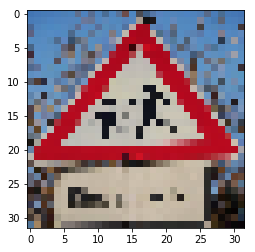

Filename = test_examples/28_children_crossing.png
Correct Index = Children crossing


Prediction:
Children crossing = 79.030824%

Top 5 classes with probabilities:
Children crossing = 0.790308
Speed limit (60km/h) = 0.165420
No passing = 0.028924
Right-of-way at the next intersection = 0.003650
Speed limit (50km/h) = 0.003635


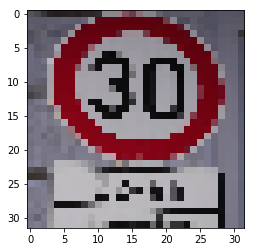

Filename = test_examples/1_speed_limit.png
Correct Index = Speed limit (30km/h)


Prediction:
Speed limit (30km/h) = 94.216472%

Top 5 classes with probabilities:
Speed limit (30km/h) = 0.942165
Speed limit (20km/h) = 0.031725
Children crossing = 0.022076
Speed limit (80km/h) = 0.001889
Speed limit (50km/h) = 0.001725


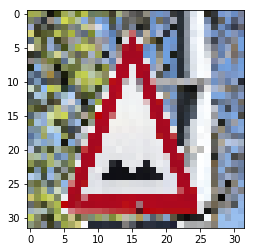

Filename = test_examples/22_bumpy_road.png
Correct Index = Bumpy road


Prediction:
Bumpy road = 100.000000%

Top 5 classes with probabilities:
Bumpy road = 1.000000
Slippery road = 0.000000
Speed limit (60km/h) = 0.000000
Dangerous curve to the right = 0.000000
Road work = 0.000000


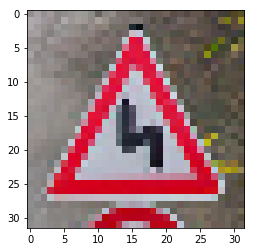

Filename = test_examples/21_Double_curve.png
Correct Index = Double curve


Prediction:
Double curve = 99.999166%

Top 5 classes with probabilities:
Double curve = 0.999992
Road narrows on the right = 0.000008
Road work = 0.000000
Bicycles crossing = 0.000000
Dangerous curve to the left = 0.000000


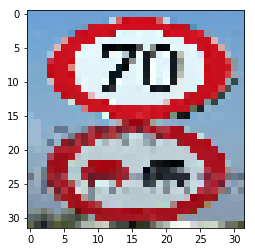

Filename = test_examples/4_no_passing_speed_limit_70.png
Correct Index = Speed limit (70km/h)


Prediction:
Road work = 99.999976%

Top 5 classes with probabilities:
Road work = 1.000000
Priority road = 0.000000
No passing for vehicles over 3.5 metric tons = 0.000000
No passing = 0.000000
No entry = 0.000000


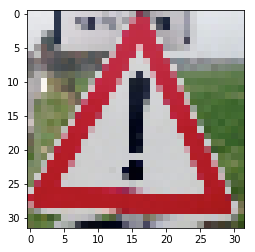

Filename = test_examples/18_general_caution.png
Correct Index = General caution


Prediction:
General caution = 100.000000%

Top 5 classes with probabilities:
General caution = 1.000000
Children crossing = 0.000000
Traffic signals = 0.000000
Right-of-way at the next intersection = 0.000000
Speed limit (30km/h) = 0.000000


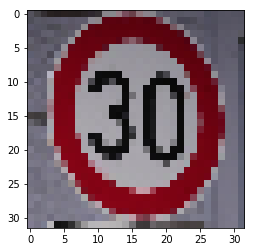

Filename = test_examples/1_30_limit.png
Correct Index = Speed limit (30km/h)


Prediction:
Speed limit (30km/h) = 100.000000%

Top 5 classes with probabilities:
Speed limit (30km/h) = 1.000000
Speed limit (20km/h) = 0.000000
Speed limit (50km/h) = 0.000000
Speed limit (70km/h) = 0.000000
Speed limit (80km/h) = 0.000000


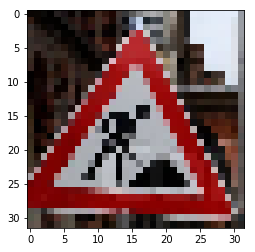

Filename = test_examples/25_Road_work.png
Correct Index = Road work


Prediction:
Road work = 100.000000%

Top 5 classes with probabilities:
Road work = 1.000000
Dangerous curve to the right = 0.000000
No passing for vehicles over 3.5 metric tons = 0.000000
Priority road = 0.000000
Road narrows on the right = 0.000000


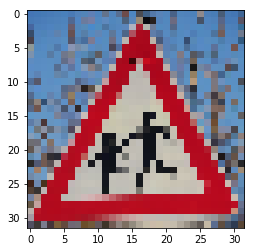

Filename = test_examples/28_children_crossing_small.png
Correct Index = Children crossing


Prediction:
Children crossing = 100.000000%

Top 5 classes with probabilities:
Children crossing = 1.000000
General caution = 0.000000
Slippery road = 0.000000
Dangerous curve to the right = 0.000000
Beware of ice/snow = 0.000000


In [10]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
import cv2
from PIL import Image
import glob
import csv 
import os
from tqdm import trange
import tqdm
import keras
from keras.preprocessing.image import ImageDataGenerator

odict = {}

datagen = keras.preprocessing.image.ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.1,
    height_shift_range=0.1,
#     rescale=1./255,
    fill_mode='nearest',

)

with open('signnames.csv', mode='r') as file:
    csvReader = csv.reader(file)
    header = next(csvReader)
    
    for row in csvReader:
        odict[int(row[0])] = row[1:]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Total samples: ", len(X_train))

    print("Training...")
    print()
    
    for i in range(EPOCHS):
        remaining_samples = n_train
        augmented_X = np.empty((0, 32, 32, 3), dtype="float32")
        augmented_Y = np.empty(0, dtype="uint8")
        X_train, y_train = shuffle(X_train, y_train)
        for offset in trange(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            

            for X,Y in datagen.flow(batch_x, batch_y):
                augmented_X = np.append(batch_x, X, axis=0)
                augmented_Y = np.append(batch_y, Y, axis=0)
                break
#             print("Training on augmented batch..")
            sess.run(training_operation, feed_dict={x: augmented_X, y: augmented_Y, keep_prob: 0.6, phase: True})
            
        loss = sess.run(loss_operation, feed_dict={x: X_validation, y: y_validation, keep_prob: 1.0, phase: False})
        validation_accuracy = evaluate(X_validation, y_validation)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Loss = {:.3f}".format(loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
   
    test_loss = sess.run(loss_operation, feed_dict={x: X_test, y: y_test, keep_prob: 1.0, phase: False})
    test_accuracy = evaluate(X_test, y_test)

    print("Test Set Loss = {:.3f}".format(test_loss))
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))
    print()

    for name in glob.glob("test_examples/*.png"):
        image = cv2.imread(name)

        thumbnail = cv2.resize(image, (32,32))
        RGB_img = cv2.cvtColor(thumbnail, cv2.COLOR_BGR2RGB)
        plt.imshow(RGB_img)
        plt.show()

#         print(sess.run(prediction, {x: np.array([RGB_img]), keep_prob: 1.0, phase: False}))
        p = sess.run(probabilities, {x: np.array([RGB_img]), keep_prob: 1.0, phase: False})
        p = p[0, 0:]
        sorted_inds = [i[0] for i in sorted(enumerate(-p), key=lambda x:x[1])]
        index = sorted_inds[0]
        
        out=os.path.basename(name).split("_")[0]
        print("Filename = %s\nCorrect Index = %s" % (name, odict[int(out)][0])) #filename is dependency
        print("\n\nPrediction:\n%s = %f%%\n" % (odict[index][0], p[index] * 100))
        a = sess.run(get_top_5, {x: np.array([RGB_img]), keep_prob: 1.0, phase: False})
                
        probs=a.values.tolist()[0]
        indices=a.indices.tolist()[0]
        print("Top 5 classes with probabilities:")
        for i in range(5):
            print("%s = %f" % (odict[indices[i]][0], probs[i]))
        

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [11]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Predict the Sign Type for Each Image

In [12]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.


### Analyze Performance

In [13]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [14]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [15]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

## Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 